# Natural Language Processing - Assignment 1
Adnan Fazlinovic and Sara Nordin Hällgren

In [1]:
import time
import spacy
import numpy as np
import seaborn as sns

from spacy import displacy
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt

sns.set_style("darkgrid")
nlp = spacy.load('en_core_web_sm')

# Warmup: Computing word frequencies

In [3]:
def count_word_frequencies(YOUR_FILE, ENCODING):
    
    freqs = Counter()
    with open(YOUR_FILE, encoding = ENCODING) as f:
        for line in f:
            tokens = line.lower().split()
            for token in tokens:
                freqs[token] += 1
                
    return freqs


def count_word_pairs(YOUR_FILE, ENCODING):
    
    freqs = defaultdict(Counter)
    with open(YOUR_FILE, encoding = ENCODING) as f:
        for line in f:
            tokens = line.lower().split()
            for t1, t2 in zip(tokens, tokens[1:]):
                freqs[t1][t2] += 1
    
    return freqs

## Most common words in each corpus

In [3]:
wiki_freqs = count_word_frequencies("a1_data/wikipedia.txt", 'utf-8')
wiki_freqs.most_common()[0:10]

[('the', 3158463),
 (',', 2566261),
 ('.', 1956600),
 ('of', 1534698),
 ('and', 1260516),
 ('in', 1205759),
 ('a', 958283),
 ('to', 926287),
 ('-', 548244),
 ('is', 522101)]

In [47]:
euro_freqs = count_word_frequencies("a1_data/europarl.txt", 'utf-8')
euro_freqs.most_common()[0:10]

[('the', 3003965),
 (',', 2115604),
 ('.', 1536632),
 ('of', 1422333),
 ('to', 1341441),
 ('and', 1158234),
 ('in', 945160),
 ('that', 732156),
 ('a', 674231),
 ('is', 671969)]

In [17]:
book_freqs = count_word_frequencies("a1_data/books.txt", 'ISO-8859-1')
book_freqs.most_common()[0:10]

[('the', 2425678),
 (',', 2064433),
 ('.', 1958494),
 ('and', 1367843),
 ('of', 1321821),
 ('to', 1159024),
 ('a', 1103939),
 ('is', 792900),
 ('in', 739009),
 ('i', 704436)]

As a first task, we read each corpus line by line and use a Counter object to identify the most common words in each. It turns out that the most common words are very similar across the corpora: the top 3 words are

1 - 'the'

2 - ','

3 - '.'

Number four is 'of' for both the Wikipedia and the European parlaiment corpora, and 'and' for the book review corpus. At a glance, the relative frequencies seem to be quite similar for different corpora as well. First of all, the comma and period should probably not be considered as words in most situations. Apart from this is makes sense that the most common words are short 'filler words'. If these words are equally important in all texts, one could exclude them from analysis completely. 

## Words following the word 'red'

In [24]:
wiki_pairs = count_word_pairs("a1_data/wikipedia.txt", 'utf-8')
wiki_pairs["red"].most_common()[1:10]

[('sox', 495),
 ('and', 467),
 ('-', 454),
 ('army', 404),
 ('cross', 278),
 ('.', 213),
 ('wings', 208),
 ('sea', 177),
 ('river', 166)]

In [25]:
euro_pairs = count_word_pairs("a1_data/europarl.txt", 'utf-8')
euro_pairs["red"].most_common()[1:10]

[('cross', 214),
 ('card', 54),
 ('lines', 37),
 ('and', 26),
 ('army', 26),
 ('light', 25),
 ('line', 23),
 (',', 22),
 ('.', 18)]

In [26]:
book_pairs = count_word_pairs("a1_data/books.txt", 'ISO-8859-1')
book_pairs["red"].most_common()[1:10]

[('herrings', 175),
 (',', 132),
 ('army', 126),
 ('and', 104),
 ('riding', 83),
 ('wine', 75),
 ('october', 69),
 ('cross', 65),
 ('"', 65)]

In the next task, we want to use nested dictionaries to analyse what words commonly follow the word "red" in the three different corpora. To keep the applications general we do not restrict to the initial word "red" when creating the dictionaries; they can be used to find the most common words following another keyword as well. Of course, this means that the code takes quite a while to run. Excluding grammatical symbols such as ',' and '-' the results are:

For the Wikipedia corpus - words most frequently following the word "red":

['sox', 495),
('and', 467),
('army', 404),
('cross', 278)]

For the European parlaiment corpus - words most frequently following the word "red":

[('cross', 214),
('card', 54),
('lines', 37),
('and', 26),
('army', 26)]

For the book review corpus - words most frequently following the word "red":

[('herrings', 175),
('army', 126),
('and', 104),
('riding', 83),
('wine', 75)]

We can see that references to the red army are common in all corpora, but apart from that we can see differences across the three. In the Wikipedia corpus, there are many references to the Red Sox baseball team. The European parlaiment on the other hand mentions the Red Cross, while the book review references red herrings (a logical fallacy). Since the three corpora are very different, it makes sense that they mention very different topics. 

# Investigating the word frequency distribution 

In [27]:
def plot_rank_frequency(freqs, plot_length):

    fig_size = (15, 5)
    font_size = 15
    x_vec = []
    y_vec = []
    
    common_words = freqs.most_common()[0:plot_length+1]

    for i in range(plot_length):
        x_vec.append(i)
        y_vec.append(common_words[i][1])

    f,(ax1, ax2) = plt.subplots(1, 2, figsize= fig_size)
    ax1.plot(x_vec, y_vec)
    ax1.set_xlabel("Rank of the word")
    ax1.set_ylabel("Frequency of the word")
    ax1.set_title("Rank/frequency plot of the " + str(plot_length) + " most common words.", fontsize = font_size)

    ax2.loglog(x_vec, y_vec)
    ax2.set_xlabel("Rank of the word")
    ax2.set_ylabel("Frequency of the word")
    ax2.set_title("Rank/frequency plot, in log-log scale.", fontsize = font_size)

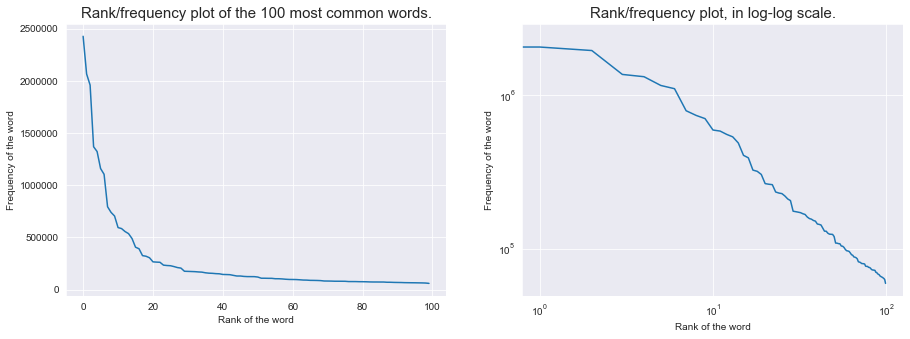

In [28]:
plot_rank_frequency(book_freqs, 100)

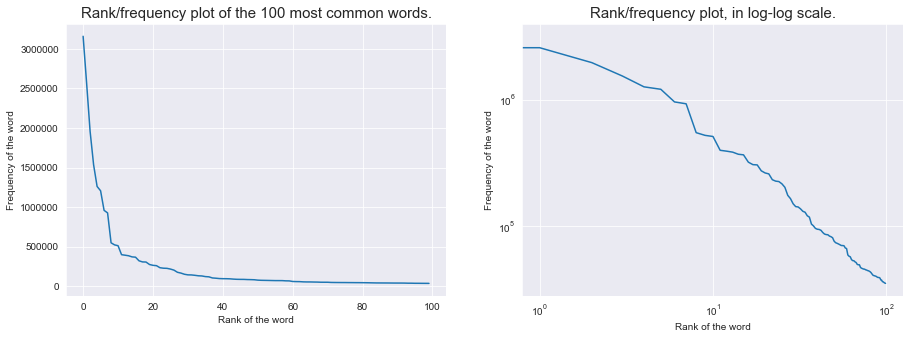

In [29]:
plot_rank_frequency(wiki_freqs, 100)

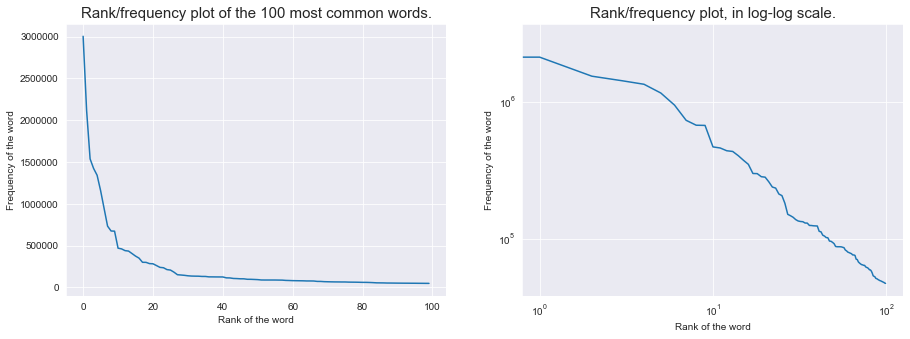

In [30]:
plot_rank_frequency(euro_freqs, 100)

## Reflection

The rank/frequency plots show for each corpus shows that a few short words occur very frequently, but that the frequency decreases quickly for less common words. This uneven distribution should make it harder to train machine learning models on language data - more specific key words occur rarely in training data, but are very important for the model's understanding. Words like 'the', 'of', and 'and' can probably be treated as noise in some applications - if we remove them we can save computational time and still preserve the meaning of the text. 

Zipf's law states that for a given corpus, the frequency of any word is inversely proportional to its rank in the frequency table. Thus, on a log-log scale we expect the rank/frequency plot to take the form of a straigt line (with a negative slope). This appears to be a good fit for the Wikipedia corpus. For both the European Parlaiment and the Book Reviews corpora, the rank/frequency plot has a smaller slope initially but follows Zipf's law well for higer rank words. 

# Comparing corpora

In [58]:
compare_length = 30

euro_common = euro_freqs.most_common()[0:compare_length+1]
book_common = book_freqs.most_common()[0:compare_length+1]

euro_remove = []
book_remove = []
common_words = []

# Make a list of words that occur in both lists
for element1 in book_common:
    word1 = element1[0]
    for element2 in euro_common:
        word2 = element2[0]
        if word1 == word2:
            common_words.append(word1)
    
# Make a list of what to remove from book list    
for i in range(len(book_common)):
    element = book_common[i][0]
    if element in common_words:
        book_remove.append(book_common[i])

# Make a list of what to remove from euro list         
for i in range(len(euro_common)):
    element = euro_common[i][0]
    if element in common_words:
        euro_remove.append(euro_common[i])      
        
# Remove common words from book list
for element in book_remove:
    book_common.remove(element)

# Remove common words from euro list    
for element in euro_remove:
    euro_common.remove(element)

In [59]:
# These words are typical for the European Parlaiment corpus, compared to the Book Review corpus:
euro_common[0:10]

[('we', 460034),
 ('which', 238724),
 ('european', 234384),
 ('will', 212210),
 ('by', 206522),
 ('has', 181565),
 ('mr', 150858),
 ('--', 147385),
 ('at', 143578)]

In [60]:
# These words are typical for the Book Review corpus, compared to the European Parlaiment corpus:
book_common[0:10]

[('book', 535757),
 ('"', 488690),
 ("'s", 390909),
 ('you', 304635),
 ('was', 265459),
 ('but', 234020),
 ('his', 228391),
 ('he', 210788),
 ('one', 175410)]

## Reflection - typical words

What words are "typical" of the European Parliament corpus when we compare it to the book review corpus, or vice versa? 

To answer this question we start by identifying the 30 most common words for each corpus. We can then check which words appear only on the Europarl list and which ones appears only on the Book review list - just like an XOR function. The results are the following:

Words that are typical for the European Parlaiment corpus (top 10):

[('we', 460034),
 ('which', 238724),
 ('european', 234384),
 ('will', 212210),
 ('by', 206522),
 ('has', 181565),
 ('mr', 150858),
 ('--', 147385),
 ('at', 143578)]
 
Words that are typical for the book review corpus (top 10):

[('book', 535757),
 ('"', 488690),
 ("'s", 390909),
 ('you', 304635),
 ('was', 265459),
 ('but', 234020),
 ('his', 228391),
 ('he', 210788),
 ('one', 175410)]
 
 
As expected, the typical words for the European parlaiment are of a more formal kind while typical words from the online book reviews are more generic and informal. Since one list of typical words contains "european" and the other one contains "book", it seems like the two lists might contain enough information to distinguish between the two corpora. If a text sample frequently mentions books, it's more likely to be a book review than a transcript from the European parlaiment.  

# Preprocessing text for machine learning

In [43]:
def create_integer_vocabulary(word_freqs, max_voc_size):
    """ 
    Create vocabulary where common words are matched to integers. 
    """
    
    word_list = []

    if len(word_freqs.most_common()) > max_voc_size:
        vocab = word_freqs.most_common()[0:max_voc_size]

    else:
        vocab = word_freqs

    for i in range(len(vocab)):
        word_list.append(vocab[i][0])

    # Get pairs of elements    
    tmp = zip(word_list, range(1,max_voc_size+1))
    # Make pairs into a dictionary
    vocab = dict(tmp)

    # Create default dictionary - returns 0 if an undefined key is called
    vocab2 = defaultdict(int)
    vocab2.update(vocab)
    
    return vocab2
 
    
def find_batch_dimensions(batch_size, filename, ENCODING):
    """
    Find the length of the longest line in each batch.
    """
    
    counter = 0      # will end up being the number of lines in the document
    len_lines = []   # will contain maximum length of a line in each batch
    tmp_lines = []
    
    with open(filename, encoding=ENCODING) as f:
        for line in f:
            counter+=1
            tokens = line.lower().split()
            tmp_lines.append(len(tokens))

            if (counter % batch_size == 0):
                len_lines.append(max(tmp_lines))
                tmp_lines = []
                
        #This takes care of the last batch if number of lines is not an exact multiple of batch_size
        if (counter % batch_size != 0): 
            len_lines.append(max(tmp_lines)) # if at end of the file
            
    return counter, len_lines
    

def create_batches(batch_size, vocabulary, filename, ENCODING):
    """
    Splits the file into batches of a specified size, and transforms common words to integers.
    The batches are outputted in a numpy array padded with zeros. Words not in the vocabulary are set to -1.
    """
    
    counter, len_lines = find_batch_dimensions(batch_size, filename, ENCODING)
    
    with open(filename, encoding=ENCODING) as f:
        batches=[]
        batch_counter=0
        line_counter=0

        for line in f:
            #This creates a temporary array each time we start a new batch
            if line_counter % batch_size == 0:
                tmp_array=np.zeros(shape=(batch_size,len_lines[batch_counter])) #fill this temporary array

            tokens = line.lower().split()
            line_as_int = list(map(vocabulary.get, tokens))
            line_as_int = [-1 if x is None else x for x in line_as_int] # set None values to -1

            tmp_array[line_counter % batch_size,0:(len(line_as_int))]=line_as_int

            line_counter+=1 #when we done
            if line_counter % batch_size ==0:
                batches.append(tmp_array)
                batch_counter+=1

        # again this takes care of the final batch if number of lines is not multiple of batch_size
        if line_counter % batch_size != 0:
            tmp_array=tmp_array[0:(line_counter % batch_size),:]
            batches.append(tmp_array)
        
    return(counter, batches)

In [44]:
max_voc_size = 1000
book_path = 'a1_data/books.txt'
iso_encoding = 'ISO-8859-1'

# Use pre-calculated word frequencies in the book review corpus!
vocab_books = create_integer_vocabulary(book_freqs, max_voc_size)

# Create and process batches using the vocabulary.
num_lines, batches = create_batches(batch_size=101, vocabulary = vocab_books, \
                                    filename = book_path, ENCODING = iso_encoding)

# Trying out an NLP toolkit

In [6]:
example = 'ASDF Inc. bought two companies last week. One of them was founded by Jane XYZ in 2012 in Germany.'
result = nlp(example)

In [7]:
# Here is some code that will show the named entities in the text:
displacy.render(result, style='ent', jupyter=True)

In [8]:
# Show the part-of-speech tags and grammatical dependency relations:
displacy.render(result, style='dep', jupyter=True)

In [9]:
# For each word (token) in the example text, print the kind of word it is (part-of-speech tag)

print('Text \t Kind of word')
for token in result:
    print(token.text, '\t', token.pos_)

Text 	 Kind of word
ASDF 	 PROPN
Inc. 	 PROPN
bought 	 VERB
two 	 NUM
companies 	 NOUN
last 	 ADJ
week 	 NOUN
. 	 PUNCT
One 	 NUM
of 	 ADP
them 	 PRON
was 	 AUX
founded 	 VERB
by 	 ADP
Jane 	 PROPN
XYZ 	 PROPN
in 	 ADP
2012 	 NUM
in 	 ADP
Germany 	 PROPN
. 	 PUNCT


In [10]:
# For each named entity in the example text, print what kind of entity it is

print('Entity \t\t Kind of entity')
for entity in result.ents:
    print(entity.text, '\t', entity.label_)

Entity 		 Kind of entity
ASDF Inc. 	 ORG
two 	 CARDINAL
last week 	 DATE
One 	 CARDINAL
Jane XYZ 	 PERSON
2012 	 DATE
Germany 	 GPE


In [11]:
another_example = """Chalmers University of Technology in Gothenburg conducts research and education 
in technology and natural sciences at a high international level. The university has 3100 employees and 
10,000 students, and offers education in engineering, science, shipping and architecture.
With scientific excellence as a basis, Chalmers promotes knowledge and technical solutions for a sustainable world. 
Through global commitment and entrepreneurship, we foster an innovative spirit, in close collaboration with wider society.
The EU’s biggest research initiative – the Graphene Flagship – is coordinated by Chalmers. 
We are also leading the development of a Swedish quantum computer. 
Chalmers was founded in 1829 and has the same motto today as it did then: Avancez – forward."""

another_result = nlp(another_example)
displacy.render(another_result, style='ent', jupyter=True)

# ORG = Companies, agencies, institutions, etc.
# GPE = Countries, cities, states
# NORP = Nationalities or religious or political groups.

In [12]:
print('Here are all verbs in the example text:')
for token in another_result:
    if token.pos_ == "VERB":
        print(token.text, '\t', token.pos_)

Here are all verbs in the example text:
conducts 	 VERB
offers 	 VERB
promotes 	 VERB
foster 	 VERB
coordinated 	 VERB
leading 	 VERB
founded 	 VERB


In [13]:
print("Here are all named entities in the example text:")
for entity in another_result.ents:
    print(entity.text, '\t \t', entity.label_)

Here are all named entities in the example text:
Chalmers University of Technology 	 	 ORG
Gothenburg 	 	 GPE
3100 	 	 CARDINAL
10,000 	 	 CARDINAL
EU 	 	 ORG
the Graphene Flagship 	 	 ORG
Chalmers 	 	 ORG
Swedish 	 	 NORP
1829 	 	 DATE
today 	 	 DATE


# Additional questions

## Most frequent nouns in the book review corpus

In [18]:
# Which are the most frequent nouns in the book review corpus?

concat_str = ""
examine_length = 100

common_words = book_freqs.most_common()[0:examine_length]

for i in range(examine_length):
    concat_str += common_words[i][0]
    concat_str += " "

books_nlp = nlp(concat_str, disable = ["ner"])    
    
print('Here are the most common nouns in the book review corpus:')
for token in books_nlp:
    if token.pos_ == "NOUN":
        print(token.text)

Here are the most common nouns in the book review corpus:
read
story
time
life
books
people
reading


We now want to identify the most common nouns in the book review corpus. Since nouns are typically only one word, a fast way to achieve this is to start with the pre-computed list of frequent words. We find that the list of mosts frequent words in the book review corpus contains seven nouns, listed here in order:

1 - read

2 - story

3 - time

4 - life

5 - books

6 - people

7 - reading

Interestingly, "read" can actually been used as a noun. For example in British English you can say "I was having a quiet read of the newspaper". Maybe it is common in the online reviews to describe a book as "a good read", in which case this result would make sense. It's also possible that questionable grammar in the reviews has confused the NLP toolkit. The same is true for "reading" - it can be used as a noun (example: "a poetry reading"), but this use does not seem very common in everyday speach. 

## Most frequently mentioned countries in the Wikipedia corpus

The goal for the next task was to find the most frequently mentioned countries in the Wikipedia corpus. For each line in the corpus we call a simplified nlp pipeline (with only the named entity recognition enabled). Spacy does not distinguish between cities, states and countries in the entity 'label_' == 'GPE'. We will use another package to solve this.

In [ ]:
#pip install geonamescache
import geonamescache

gc = geonamescache.GeonamesCache()
countries = gc.get_countries()
cc = []
for _, info in countries.items():
    cc.append(info['name'].lower())

Find most frequently mentioned countries (GPE in this case, we will filter this later).

In [ ]:
# This cell takes a while to run. We ran it locally on another console and wrote out the most frequent countries.

gpes = []

t0 = time.perf_counter()

# Save lines that contain any country, state or city

with open('a1_data/wikipedia.txt', encoding = 'utf-8') as f:
    for line in f:
        result = nlp(line, disable=['tagger','parser'])
        for token in result.ents:
            if token.label_ == "GPE":
                gpes.append(token.text)
            
t1 = time.perf_counter() - t0
print("Time elapsed: ", t1)

In [ ]:
freq_countries = Counter()

for c in gpes:
    if c.lower() in cc:
        freq_countries[c.lower()] += 1
        
freq_countries.most_common()

We see that the most frequently mentioned countries in the Wikipedia corpus is:
1. France,
2. Germany,
3. Canada \
etc.

## Common drinks in the European Parlaiment corpus

In [151]:
YOUR_FILE = "a1_data/europarl.txt"
ENCODING = 'utf-8'
counter = 0
line_idx = []
texts = []

t0 = time.perf_counter()

# Save lines that contain any tense of the word "drink"
with open(YOUR_FILE, encoding = ENCODING) as f:
    for line in f:
        result = nlp(line, disable=["tagger", "parser", "ner"])
        for token in result:
            if token.lemma_ == "drink":
                line_idx.append(counter) 
                texts.append(line)
        
        #counter += 1
        #if counter > 500000:
        #    break       
            
t1 = time.perf_counter() - t0
print("Time elapsed: ", t1) 

Time elapsed:  313.50149709999096


In [152]:
# Apply the full NLP pipeline to saved texts
t0 = time.perf_counter()
docs = list(nlp.pipe(texts))
t1 = time.perf_counter() - t0  
print("Time elapsed: ", t1) 

Time elapsed:  7.0229939999990165


In [153]:
# Count occurrences of different drinks
drinking_freqs = Counter()

for doc in docs:
    for token in doc:
        if (token.head.lemma_ == "drink") and (token.pos_ == "NOUN"):
            drinking_freqs[token.text] += 1
            

In [154]:
drinking_freqs.most_common()[0:10]

[('water', 37),
 ('spirit', 37),
 ('milk', 24),
 ('alcohol', 23),
 ('wine', 17),
 ('driving', 12),
 ('energy', 11),
 ('children', 8),
 ('industry', 8),
 ('beer', 8)]

Using this method, we find that the most common drinks in the Eurpean Parlaiment corpus are water, spirits, milk, alcohol, and wine. After this we also notice that "driving" and "energy" show up in the list - these of course relate to discussions about drunk driving, and energy drinks.

The method we have used does not understand that "energy drink" itself is one word - this seems difficult to implement. For the same reason we also pick up on references to drunk driving, as we did not find a clear cut way of only finding drinkable objects. Currently we have saved all nouns whose grammatical head is any form of the word 'drink'. It is slightly disturbing that "children" also appear on the list of most common drinks; presumably this is from discussions about providing drinking water for children. 

If you want to get more specific about the linguistics side of this problem, it should be possible to follow the arrows in the NLP dependency graph from "drink" to the end, and save all nouns. There might then be a clever way of distinguishing which nouns are actually being drunk, based on the grammatical context. 

In [156]:
# Example of where "children" show up in relation to drinking
docs[1]

Mr President , even when my home country , Poland , was under Communist rule , encouraging children to drink was frowned upon .